['4.JPG', '.ipynb_checkpoints', '3.jpg', '1.jpg', '2.jpg']


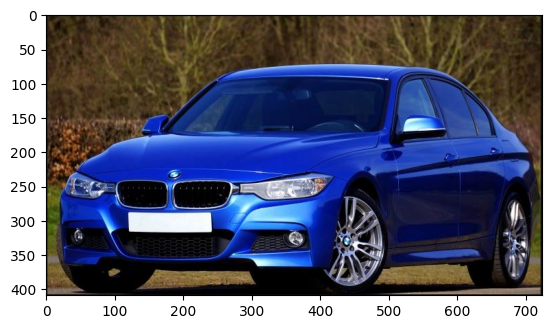

In [17]:
import sys
import cv2
import glob
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Activation, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

# Print files in the input directory
print(os.listdir("/content/c/"))

# Enable inline plotting for Jupyter
%matplotlib inline

# Image dimensions
img_rows = 32
img_cols = 32
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100

# Generator model
def generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))
    z = Input(shape=(z_dim,))
    img = model(z)
    return Model(z, img)

# Discriminator model
def discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    img = Input(shape=img_shape)
    prediction = model(img)
    return Model(img, prediction)

# Compile discriminator
discriminator = discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Compile generator
generator = generator(img_shape, z_dim)

# Combined model
z = Input(shape=(z_dim,))
img = generator(z)
discriminator.trainable = False
prediction = discriminator(img)
combined = Model(z, prediction)
combined.compile(loss='binary_crossentropy', optimizer=Adam())

# Load and display an image
img_path = "/content/c/4.JPG"
img_ = cv2.imread(img_path, 5)
# Convert to RGB for displaying with matplotlib
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
plt.imshow(img_)
  # Hide axes
plt.show()
